# Data Visualization Using `plotnine`

The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

### Repository
[GitHub Repository](https://github.com/shiqiwu212/GSB-S54401/tree/9b30d5f1456ed60efbe2c7651332d8fd8f696e46/week%201)

In [17]:
# ChatGPT contribution 
# Minimal imports and robust mtcars loading 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

### Repository
[GitHub Repository (click to open)](https://github.com/<your-username>/<your-repo>)

# Try 1: pydataset
try:
    from pydataset import data
    df = data('mtcars')[['mpg','cyl','wt','am']]
except Exception:
    # Try 2: local CSV (same folder)
    try:
        df = pd.read_csv('mtcars.csv')[['mpg','cyl','wt','am']]
    except Exception:
        # Try 3: inline fallback (small mtcars subset -> enough for plots)
        _csv = StringIO("""mpg,cyl,wt,am
21.0,6,2.620,1
21.0,6,2.875,1
22.8,4,2.320,1
21.4,6,3.215,0
18.7,8,3.440,0
18.1,6,3.460,0
14.3,8,3.570,0
24.4,4,3.190,0
22.8,4,3.150,0
19.2,6,3.440,0
17.8,6,3.440,0
16.4,8,4.070,0
17.3,8,3.730,0
15.2,8,3.780,0
10.4,8,5.250,0
26.0,4,2.140,1
30.4,4,1.615,1
15.8,8,3.520,0
19.7,6,2.770,1
15.0,8,3.780,0
21.4,4,2.780,1
18.1,6,3.150,0
11.4,8,5.424,0
18.7,8,3.840,0
""")
        df = pd.read_csv(_csv)

# quick preview (helps the report)
df.head()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (4014363866.py, line 9)

In [ ]:
df

,mpg,cyl,wt,am
0,21.0,6,2.620,1
1,21.0,6,2.875,1
2,22.8,4,2.320,1
3,21.4,6,3.215,0
4,18.7,8,3.440,0
5,18.1,6,3.460,0
6,14.3,8,3.570,0
7,24.4,4,3.190,0
8,22.8,4,3.150,0
9,19.2,6,3.440,0


The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [ ]:
df["am"] = df["am"].astype(str)

# Convert the other variables below

If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?

It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

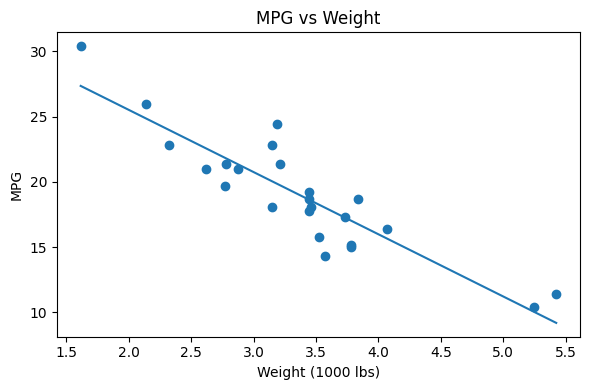

In [ ]:
# Create plot for (1) here
# ChatGPT contribution 
# Scatter: mpg vs weight, with a simple linear trend line
x = df['wt']
y = df['mpg']

plt.figure(figsize=(6, 4))
plt.scatter(x, y)  # raw points

# simple linear fit (degree=1)
coef = np.polyfit(x, y, 1)              # slope, intercept
xx = np.linspace(x.min(), x.max(), 100)
yy = coef[0] * xx + coef[1]
plt.plot(xx, yy)

plt.xlabel('Weight (1000 lbs)')
plt.ylabel('MPG')
plt.title('MPG vs Weight')
plt.tight_layout()
plt.show()

<positron-console-cell-14>:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


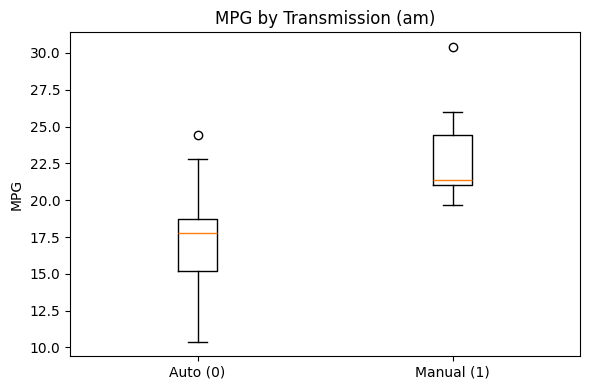

In [ ]:
# Create plot for (2) here
# ChatGPT contribution 
# Robust boxplot of mpg by transmission (am: 0=auto, 1=manual).

import matplotlib.pyplot as plt
import pandas as pd

# force numeric; coerce bad values to NaN 
am_num  = pd.to_numeric(df['am'],  errors='coerce')
mpg_num = pd.to_numeric(df['mpg'], errors='coerce')

auto_mpg   = mpg_num[am_num == 0].dropna().values
manual_mpg = mpg_num[am_num == 1].dropna().values

plt.figure(figsize=(6,4))
plt.boxplot([auto_mpg, manual_mpg], labels=['Auto (0)', 'Manual (1)'])
plt.ylabel('MPG')
plt.title('MPG by Transmission (am)')
plt.tight_layout()
plt.show()

Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

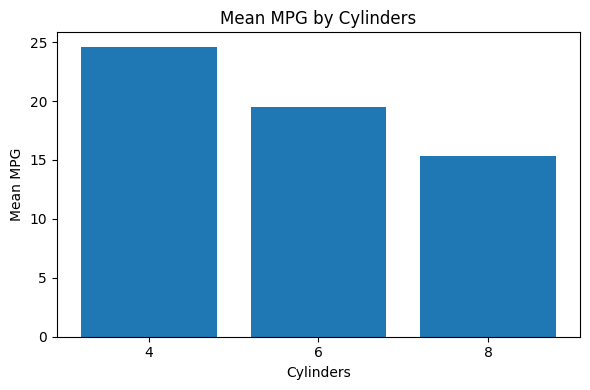

cyl
4    24.6
6    19.5
8    15.3
Name: mpg, dtype: float64

In [ ]:
# Create plot with first new geometry here
# ChatGPT contribution
# Bar chart: mean mpg by cylinders.
import matplotlib.pyplot as plt

mean_by_cyl = df.groupby('cyl', as_index=True)['mpg'].mean().round(1)

plt.figure(figsize=(6,4))
plt.bar(mean_by_cyl.index.astype(str), mean_by_cyl.values)
plt.xlabel('Cylinders')
plt.ylabel('Mean MPG')
plt.title('Mean MPG by Cylinders')
plt.tight_layout()
plt.show()

# keep exact numbers in output 
mean_by_cyl

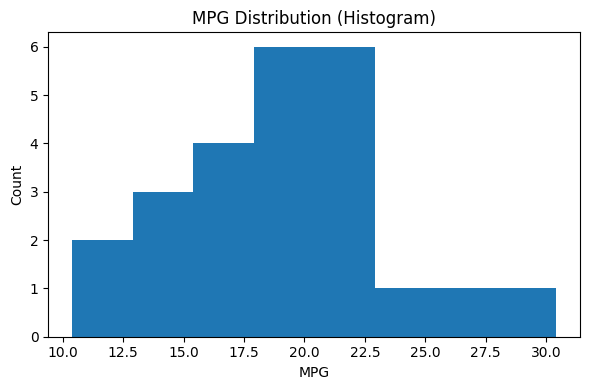

In [ ]:
# Create plot with second new geometry here
# ChatGPT contribution
# Histogram of mpg.
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['mpg'], bins=8)  
plt.xlabel('MPG')
plt.ylabel('Count')
plt.title('MPG Distribution (Histogram)')
plt.tight_layout()
plt.show()

<positron-console-cell-8>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


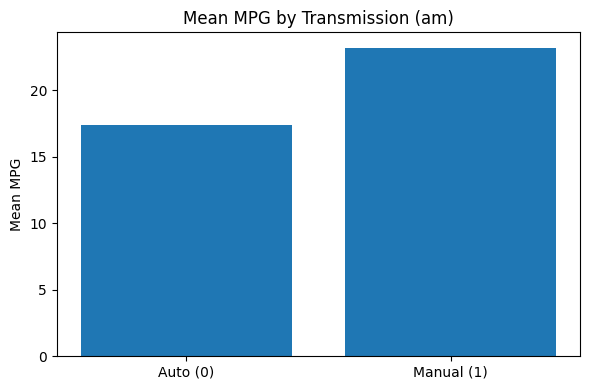

am
0    17.4
1    23.2
Name: mpg, dtype: float64

In [ ]:
# Create plot with third new geometry here
# ChatGPT contribution 
# Bar chart: mean mpg by transmission (am).
import matplotlib.pyplot as plt

mean_by_am = df.groupby('am', as_index=True)['mpg'].mean().round(1)
labels = ['Auto (0)', 'Manual (1)']
values = [mean_by_am.get(0, float('nan')), mean_by_am.get(1, float('nan'))]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.ylabel('Mean MPG')
plt.title('Mean MPG by Transmission (am)')
plt.tight_layout()
plt.show()

# show values 
mean_by_am